# Scipy - Loading MNIST Dataset

### download MNIST mat file from this link
https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat

In [3]:
# Alternative local file loader (due to mldata.org being down)
from scipy.io import loadmat

mnist_raw = loadmat("mldata/mnist-original.mat")
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
    }

In [4]:
# 70K images, 28x28 pixels/image, each pixel = 0 (white) to 255 (black)
mnist # a dict object

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [5]:
# take a peek
X,y = mnist['data'], mnist['target']

X.shape, y.shape

((70000, 784), (70000,))

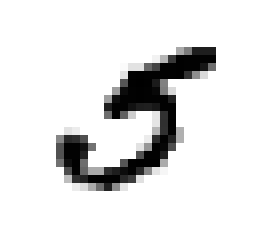

5.0

In [21]:
# display example image
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(
    some_digit_image, 
    cmap = plt.cm.binary,
    interpolation="nearest")

plt.axis("off")
plt.show()

# looks like a "five". What's the corresponding label?
y[36000]

In [18]:
import matplotlib.pyplot as plt

def plot_digit(X, y):
    digit_image = X.reshape(28, 28)

    plt.imshow(
        digit_image, 
        cmap = plt.cm.binary,
        interpolation="nearest")

    plt.axis("off")
    plt.show()
    
    print("Label", y)


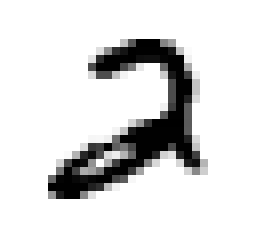

('Label', 2.0)


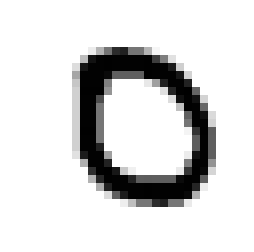

('Label', 0.0)


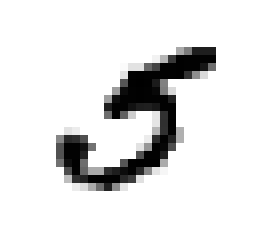

('Label', 5.0)


In [22]:
plot_digit(X[15000], y[15000])
plot_digit(X[2000], y[2000])
plot_digit(X[36000], y[36000])

In [23]:
# dataset already split into training (1st 60K) & test (last 10K) images.
# shuffle training set for cross-validation quality

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((60000, 784), (10000, 784), (60000,), (10000,))


## Exploring MNIST Dataset

In [24]:
import matplotlib.pyplot as plt

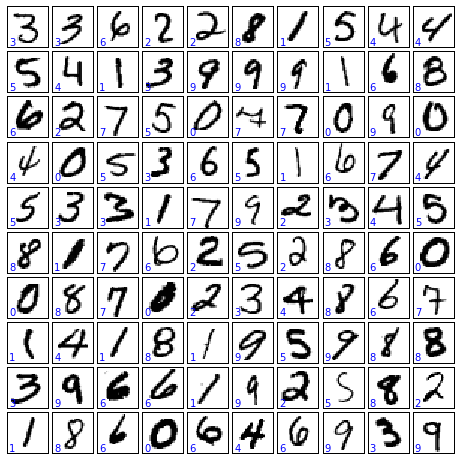

In [38]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape((28,28)), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(int(y_train[i])),
           transform=ax.transAxes, color='blue')